In [84]:


_PCVERSION_=True


if _PCVERSION_:
    basedir="C:/Users/sipocz/OneDrive/Dokumentumok/GitHub/_EarthQuake/gpos_lin"
else:
    from google.colab import drive
    drive.mount('/content/drive',force_remount=True)
    basedir="/content/drive/My Drive/001_AI/_EarthQuake/gpos_lin"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#--------------scikit import 
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#--------------

def outlierStatistic(X_train_predict):
    print(X_train_predict)
    maxX=len(X_train_predict)
    outlier=0
    for i in X_train_predict:
        if i==-1:
            outlier+=1
    print(f"A összes ({maxX} darabból {outlier} darab outlier van. Az {outlier/maxX*100:5.1f} %.)")


def checkvalues(df,columnname,key):
    print(f"{columnname} ellenőrzése !")
    numok=0
    numerr=0
    for i in df.index:
        if df.at[i,columnname] in key:
            #print(df.at[i,columnname])
            numok+=1
            pass
        else:
            numerr+=1
            print(df.at[i,columnname],end=", ")
    sumall=numok+numerr
    print(f"\n{sumall} mintából {numerr} db nem volt megfelelő")


def createcolumn(df,columnname,keys):
    print(f"{columnname} cseréje megy")
    for key in keys:
        df[keys[key]]=0.0
    for key in keys:
        for i in df.index:
            if df.at[i,columnname]==key:
                df.at[i,keys[key]]=1.0


def create_dict(idx,list):
    o={}
    for i in list:
        o[i]=idx+"_"+i
    return o

def create_base_data(df):
    t=['n', 't', 'o']
    columnname="land_surface_condition"
    key=create_dict(columnname,t)


    #checkvalues(df,columnname,key)
    createcolumn(df,columnname,key)

    t= ['h', 'w', 'i', 'r', 'u']
    columnname="foundation_type"
    key=create_dict(columnname,t)

    #checkvalues(df,columnname,key)
    createcolumn(df,columnname,key)

    t=  ['q', 'n', 'x']
    columnname="roof_type"
    key=create_dict(columnname,t)

    #checkvalues(df,columnname,key)
    createcolumn(df,columnname,key)

    t=  ['z', 'v', 'f', 'm', 'x']
    columnname="ground_floor_type"
    key=create_dict(columnname,t)

    #checkvalues(df,columnname,key)
    createcolumn(df,columnname,key)

    t=   ['q', 's', 'j', 'x']
    columnname="other_floor_type"
    key=create_dict(columnname,t)

    #checkvalues(df,columnname,key)
    createcolumn(df,columnname,key)

    t=   ['j', 's', 't', 'o']
    columnname="position"
    key=create_dict(columnname,t)

    #checkvalues(df,columnname,key)
    createcolumn(df,columnname,key)

    t=   ['c', 's', 'f', 'd', 'm', 'a', 'q', 'u', 'n', 'o']
    columnname="plan_configuration"
    key=create_dict(columnname,t)

    #checkvalues(df,columnname,key)
    createcolumn(df,columnname,key)

    t=['a', 'w', 'r', 'v']
    columnname="legal_ownership_status"
    key=create_dict(columnname,t)

    #checkvalues(df,columnname,key)
    createcolumn(df,columnname,key)

    # level 1: 0-30, level 2: 0-1427, level 3: 0-12567.
    # level1:0--30
    # level2: 0.0000-----------0.9999
    # level3: 0.000000000------0.000099999
    l1=df.geo_level_1_id
    l2=(df.geo_level_2_id/1427*9999)/10000
    l3=(df.geo_level_2_id/12567*99999)/1000000000
    df["geopos"]=l1+l2+l3
    return(df)



def kill_columns(df):
    notkey=["Unnamed: 0","building_id","legal_ownership_status","geo_level_1_id",	"geo_level_2_id",	"geo_level_3_id", "land_surface_condition",	"foundation_type",	"roof_type",	"ground_floor_type",	"other_floor_type",	"position",	"plan_configuration"]
    for i in df.columns:
        #print(i)
        if i in notkey:
            df.drop(columns=[i], inplace=True)
    return df







In [85]:
def check_similarity_np(np1,np2):
    db=0
    maxi=0
    for ind, i1 in enumerate(np1):
        maxi+=1
        i2=np2[ind]
        if i1!=i2:
            db+=1
    #print(f"{ind}. eset:  {i:3},{i2:3}")
    print(f"hiba:{db} max:{maxi} -- error:{db/maxi*100.0 : 2.6} good %:{100-db/maxi*100.0 : 2.6} %")

In [86]:

features_train=basedir+"/orig/train_values.csv"
labels_train=basedir+"/orig/train_labels.csv"
features_predict=basedir+"/orig/test_values.csv"

X_train=pd.read_csv(features_train)
y_train=pd.read_csv(labels_train)
X_pred=pd.read_csv(features_predict)
#
X_pred_conv=create_base_data(X_pred)
X_train_conv=create_base_data(X_train)
#
X_train_ok=kill_columns(X_train_conv)
X_pred_ok=kill_columns(X_pred_conv)
y_train_ok=kill_columns(y_train)

X_train_ok.to_csv(basedir+"/tmp/X_tran_ok.csv",index=False)
X_pred_ok.to_csv(basedir+"/tmp/X_pred_ok.csv",index=False)
y_train_ok.to_csv(basedir+"/tmp/y_train_ok.csv",index=False)




#f=open(basedir+"/tmp/similarity.csv","a")
X_train_ok=pd.read_csv(basedir+"/tmp/X_tran_ok.csv",)
X_pred_ok=pd.read_csv(basedir+"/tmp/X_pred_ok.csv")
y_train_ok=pd.read_csv(basedir+"/tmp/y_train_ok.csv")

X_train_ok.head()
X_pred_ok.head()
#print("Ready")

land_surface_condition cseréje megy
foundation_type cseréje megy
roof_type cseréje megy
ground_floor_type cseréje megy
other_floor_type cseréje megy
position cseréje megy
plan_configuration cseréje megy
legal_ownership_status cseréje megy
land_surface_condition cseréje megy
foundation_type cseréje megy
roof_type cseréje megy
ground_floor_type cseréje megy
other_floor_type cseréje megy
position cseréje megy
plan_configuration cseréje megy
legal_ownership_status cseréje megy


,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,...,plan_configuration_a,plan_configuration_q,plan_configuration_u,plan_configuration_n,plan_configuration_o,legal_ownership_status_a,legal_ownership_status_w,legal_ownership_status_r,legal_ownership_status_v,geopos
0,3,20,7,6,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,17.417622
1,2,25,13,5,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.098800
2,2,5,4,5,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,22.013313
3,1,0,19,3,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,26.027328
4,3,15,8,7,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,17.202505


In [87]:
X_pred_ok=kill_columns(X_pred_ok)
X_train_ok=kill_columns(X_train_ok)
y_train_ok=kill_columns(y_train_ok)

In [88]:
from sklearn.preprocessing import StandardScaler



scaler2=StandardScaler()
X_train_scale=scaler2.fit_transform(X_train_ok)

#scaler1=StandardScaler()
X_pred_scale=scaler2.fit_transform(X_pred_ok)
"""
scaler3=StandardScaler()
y_train_scale=scaler3.fit_transform(y_train_ok)
"""
y_train_np=y_train_ok.to_numpy()

# szétszedjük a train és test részekre
from sklearn.model_selection import train_test_split
#X_train_train, X_train_test,y_train_train, y_train_test  = train_test_split( X_train_scale, y_train_scale, test_size=0.10, random_state=0)
X_train_train, X_train_test,y_train_train, y_train_test  = train_test_split( X_train_scale, y_train_np, test_size=0.30, random_state=0)




In [89]:
# *************
# * LDA       *
# *************

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2, solver="svd", tol=0.000000001)
lda.fit(X_train_train, y_train_train)

X_train_lda = lda.transform(X_train_train)
#y_train = lda.transform(y_train_train)
X_test_lda=lda.transform(X_train_test)






In [90]:
def outlierDropfrom_df(df,inxlist):
    a=df
    out=a.drop(inxlist,axis=0)
    return(out)

In [91]:
def outlierDropfrom_numpyarray(na,inxlist):
    
    out=np.delete (na ,inxlist, axis=0)
    return(out)

In [118]:
def calc_the_range(y_train,hist):    
    num1=sum(1 for val in y_train if val==1)
    #print(num1)
    num2=sum(1 for val in y_train if val==2)
    #print(num2)
    num3=sum(1 for val in y_train if val==3)
    #print(num3)
    
    out=(num1,num1+num2,num1+num2+num3)
    print("out: " ,out)
    steps=[]
    for i in range(len(hist[0])):
        print(hist[0][i], end="")
        if hist[0][i]>out[0]:
            steps.append(i)
            break
    for i in range(len(hist[0])):
        #print(hist[0][i])
        if hist[0][i]>out[1]:
            steps.append(i)
            break
    print("step:",steps)
    limits_out=(hist[1][steps[0]],hist[1][steps[1]])
    print("Limits:",limits_out)
    return (limits_out)

In [108]:
def conv_a_floatlist(alist, range_x):
    o=[]
    print("conv:" ,range_x)
    for i in alist:
        if i<=range_x[0]:
            o.append(1)
        if range_x[0]< i <=range_x[1]:
            o.append(2)
        if range_x[1]<i:
            o.append(3)
    return(o)

In [92]:
print(y_train_train)

[[3]
 [2]
 [2]
 ...
 [3]
 [3]
 [2]]


In [93]:
# XGBClassifier
'''
from xgboost import XGBClassifier  # 72.09
# max_depth=10 : 72.79857561664441

knn = XGBClassifier(verbosity=3,max_depth = 13,n_estimators=100,loss="deviance", criterion="mae")

print("Fit: Inlier betanitás Start--")

knn.fit(X_train_train_out, y_train_train_out)

print("Fit End - Prediction Start ")
'''

'\nfrom xgboost import XGBClassifier  # 72.09\n# max_depth=10 : 72.79857561664441\n\nknn = XGBClassifier(verbosity=3,max_depth = 13,n_estimators=100,loss="deviance", criterion="mae")\n\nprint("Fit: Inlier betanitás Start--")\n\nknn.fit(X_train_train_out, y_train_train_out)\n\nprint("Fit End - Prediction Start ")\n'

In [176]:
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
#from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
#clf = GradientBoostingClassifier(random_state=0,n_estimators=5250, max_depth=43, verbose=3, tol=0.0001)
#clf = HistGradientBoostingClassifier(random_state=1, max_depth=53, verbose=3, tol=0.000001, learning_rate=0.6, max_iter=2000,early_stopping=False,min_samples_leaf=5000, scoring="balanced_accuracy")
clf=HistGradientBoostingRegressor(random_state=1, max_depth=113, verbose=3, tol=0.00000001, learning_rate=0.1, max_iter=4000,early_stopping=True,min_samples_leaf=50, loss="poisson",n_iter_no_change=80)

clf.fit(X_train_train, y_train_train)
print("Fit End - Prediction Start ")

89/4000] 1 tree, 31 leaves, max depth = 13, train loss: 0.04381, val loss: 0.05099, in 0.030s
[1490/4000] 1 tree, 31 leaves, max depth = 15, train loss: 0.04381, val loss: 0.05099, in 0.050s
[1491/4000] 1 tree, 31 leaves, max depth = 12, train loss: 0.04381, val loss: 0.05099, in 0.058s
[1492/4000] 1 tree, 31 leaves, max depth = 12, train loss: 0.04380, val loss: 0.05099, in 0.038s
[1493/4000] 1 tree, 31 leaves, max depth = 14, train loss: 0.04380, val loss: 0.05099, in 0.035s
[1494/4000] 1 tree, 31 leaves, max depth = 16, train loss: 0.04379, val loss: 0.05099, in 0.031s
[1495/4000] 1 tree, 31 leaves, max depth = 11, train loss: 0.04379, val loss: 0.05099, in 0.031s
[1496/4000] 1 tree, 31 leaves, max depth = 9, train loss: 0.04379, val loss: 0.05099, in 0.029s
[1497/4000] 1 tree, 31 leaves, max depth = 9, train loss: 0.04378, val loss: 0.05099, in 0.034s
[1498/4000] 1 tree, 31 leaves, max depth = 12, train loss: 0.04378, val loss: 0.05099, in 0.033s
[1499/4000] 1 tree, 31 leaves, max 

In [177]:
# test the training set
#------------------------------------

y_train_train_pred=clf.predict(X_train_train)


#------------------------------------

[1.00000e+00 1.00000e+00 1.00000e+00 3.00000e+00 5.00000e+00 6.00000e+00
 7.00000e+00 1.10000e+01 1.40000e+01 1.40000e+01 2.00000e+01 2.90000e+01
 4.00000e+01 4.90000e+01 6.60000e+01 9.50000e+01 1.25000e+02 1.54000e+02
 1.79000e+02 2.25000e+02 2.77000e+02 3.24000e+02 3.89000e+02 4.70000e+02
 5.50000e+02 6.29000e+02 7.08000e+02 8.22000e+02 9.30000e+02 1.05200e+03
 1.17600e+03 1.30900e+03 1.45300e+03 1.60700e+03 1.74300e+03 1.90300e+03
 2.05400e+03 2.23200e+03 2.42600e+03 2.59700e+03 2.80300e+03 3.00000e+03
 3.20500e+03 3.41500e+03 3.65500e+03 3.88900e+03 4.10300e+03 4.34000e+03
 4.59200e+03 4.83200e+03 5.07700e+03 5.33200e+03 5.59800e+03 5.87800e+03
 6.16200e+03 6.41900e+03 6.70000e+03 6.94400e+03 7.23700e+03 7.50300e+03
 7.80600e+03 8.07800e+03 8.37900e+03 8.66900e+03 8.98300e+03 9.31500e+03
 9.58800e+03 9.89200e+03 1.02160e+04 1.05170e+04 1.08540e+04 1.11710e+04
 1.14820e+04 1.18440e+04 1.21750e+04 1.25650e+04 1.28710e+04 1.32500e+04
 1.35810e+04 1.39020e+04 1.43150e+04 1.47050e+04 1.

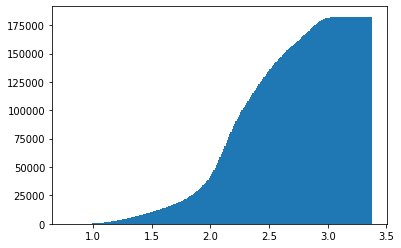

In [182]:
a=plt.hist(y_train_train_pred,250,cumulative=True);
print(a[0])

In [183]:
def show_similarity(a,b):
    for i in range(min(len(a),1000)):
        print(f"{a[i]}-{b[i]} ",end="")

In [184]:
range_x=calc_the_range(y_train_train,a)
y_train_train_conv=conv_a_floatlist(y_train_train_pred,range_x)
check_similarity_np(y_train_train_conv,y_train_train)
show_similarity(y_train_train_conv,y_train_train)


out:  (17667, 121503, 182420)
1.01.01.03.05.06.07.011.014.014.020.029.040.049.066.095.0125.0154.0179.0225.0277.0324.0389.0470.0550.0629.0708.0822.0930.01052.01176.01309.01453.01607.01743.01903.02054.02232.02426.02597.02803.03000.03205.03415.03655.03889.04103.04340.04592.04832.05077.05332.05598.05878.06162.06419.06700.06944.07237.07503.07806.08078.08379.08669.08983.09315.09588.09892.010216.010517.010854.011171.011482.011844.012175.012565.012871.013250.013581.013902.014315.014705.015064.015458.015867.016272.016720.017119.017527.017997.0step: [89, 157]
Limits: (1.7041647788855192, 2.4095637369131087)
conv: (1.7041647788855192, 2.4095637369131087)
hiba:46335 max:182420 -- error: 25.4002 good %: 74.5998 %
2-[3] 2-[2] 3-[2] 2-[3] 2-[2] 3-[3] 2-[2] 3-[3] 3-[3] 2-[2] 1-[2] 3-[3] 2-[2] 1-[2] 2-[2] 3-[3] 3-[2] 2-[1] 2-[3] 2-[2] 3-[3] 2-[2] 3-[3] 3-[3] 2-[2] 3-[3] 1-[1] 3-[2] 2-[2] 2-[2] 2-[2] 1-[1] 3-[3] 2-[2] 3-[2] 3-[2] 2-[2] 1-[2] 3-[3] 3-[2] 2-[2] 2-[2] 3-[2] 1-[1] 3-[2] 2-[3] 2-[2] 2-[2] 3-

In [185]:
# test the test set
#------------------------------------

y_train_test_pred=clf.predict(X_train_test)
y_train_test_conv=conv_a_floatlist(y_train_test_pred,range_x)
check_similarity_np(y_train_test_conv,y_train_test)
#------------------------------------

conv: (1.7041647788855192, 2.4095637369131087)
hiba:22715 max:78181 -- error: 29.0544 good %: 70.9456 %


In [137]:
# futtass ez felett !!

In [186]:
#outfile generation
y_pred_ok=clf.predict(X_pred_scale)
print("Prediction End")

X_pred_bd=pd.read_csv(basedir+"/orig/test_values.csv")

y_pred_ok_int=conv_a_floatlist(y_pred_ok,range_x)


Prediction End
conv: (1.7041647788855192, 2.4095637369131087)


In [187]:
buildingid=X_pred_bd["building_id"]
head2=y_pred_ok_int


outdf=pd.DataFrame(data={"damage_grade":y_pred_ok_int} ,index=buildingid)
outdf.index.name="building_id"


outdf.head()
st=30
sts=str(st)
outdf.to_csv(basedir+"/out/submission_"+sts+"_xgboost.csv")
print()
print(basedir+"/out/submission_"+sts+"_xgboost.csv")


C:/Users/sipocz/OneDrive/Dokumentumok/GitHub/_EarthQuake/gpos_lin/out/submission_30_xgboost.csv


In [ ]:
if not( _PCVERSION_):
    !head "/content/drive/My Drive/001_AI/_EarthQuake/gpos_lin/out/submission_24_xgboost.csv"